In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.api import VAR

import yfinance as yf

In [2]:
google = yf.Ticker("GOOG")
apple = yf.Ticker("AAPL")
microsoft = yf.Ticker("MSFT")
nvidia = yf.Ticker("NVDA")
amazon = yf.Ticker("AMZN")
meta = yf.Ticker("META")

google_data = google.history(start='2023-01-01', end='2024-01-01')
apple_data = apple.history(start='2023-01-01', end='2024-01-01')
microsoft_data = microsoft.history(start='2023-01-01', end='2024-01-01')
nvidia_data = nvidia.history(start='2023-01-01', end='2024-01-01')
amazon_data = amazon.history(start='2023-01-01', end='2024-01-01')
meta_data = meta.history(start='2023-01-01', end='2024-01-01')

In [34]:
del close_df

In [3]:
close_df = pd.DataFrame()
close_df["Apple"] = apple_data.Close
close_df["Google"] = google_data.Close
close_df["Microsoft"] = microsoft_data.Close
close_df["Nvidia"] = nvidia_data.Close
close_df["Amazon"] = amazon_data.Close
close_df["Meta"] = meta_data.Close
close_df

,Apple,Google,Microsoft,Nvidia,Amazon,Meta
Date,,,,,,
2023-01-03 00:00:00-05:00,124.048042,89.699997,236.609238,143.079788,85.820000,124.607788
2023-01-04 00:00:00-05:00,125.327507,88.709999,226.259171,147.417679,85.139999,127.235008
2023-01-05 00:00:00-05:00,123.998459,86.769997,219.553375,142.580032,83.120003,126.805458
2023-01-06 00:00:00-05:00,128.560867,88.160004,222.140869,148.517120,86.080002,129.882202
2023-01-09 00:00:00-05:00,129.086533,88.800003,224.303680,156.203369,87.360001,129.332779
...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472
2023-12-26 00:00:00-05:00,192.542816,142.820007,373.295135,492.766907,153.410004,354.453918
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714


In [4]:
close_df.corr()

,Apple,Google,Microsoft,Nvidia,Amazon,Meta
Apple,1.000000,0.851580,0.948934,0.921846,0.884748,0.930395
Google,0.851580,1.000000,0.900014,0.946143,0.940624,0.952210
Microsoft,0.948934,0.900014,1.000000,0.936636,0.937690,0.958880
Nvidia,0.921846,0.946143,0.936636,1.000000,0.955811,0.977675
Amazon,0.884748,0.940624,0.937690,0.955811,1.000000,0.951626
Meta,0.930395,0.952210,0.958880,0.977675,0.951626,1.000000


In [7]:
close_df.diff().corr()

,Apple,Google,Microsoft,Nvidia,Amazon,Meta
Apple,1.000000,0.506537,0.537514,0.439919,0.401194,0.532933
Google,0.506537,1.000000,0.474891,0.438752,0.601035,0.617899
Microsoft,0.537514,0.474891,1.000000,0.528919,0.548641,0.546735
Nvidia,0.439919,0.438752,0.528919,1.000000,0.409052,0.485250
Amazon,0.401194,0.601035,0.548641,0.409052,1.000000,0.601510
Meta,0.532933,0.617899,0.546735,0.485250,0.601510,1.000000


In [9]:
(close_df.diff()/close_df).corr()

,Apple,Google,Microsoft,Nvidia,Amazon,Meta
Apple,1.000000,0.531700,0.547209,0.466791,0.435736,0.552409
Google,0.531700,1.000000,0.508732,0.433982,0.615009,0.621317
Microsoft,0.547209,0.508732,1.000000,0.551662,0.577404,0.543960
Nvidia,0.466791,0.433982,0.551662,1.000000,0.415757,0.458350
Amazon,0.435736,0.615009,0.577404,0.415757,1.000000,0.589572
Meta,0.552409,0.621317,0.543960,0.458350,0.589572,1.000000


Actual prices have strong correlation among themselves but the price mevements themselves do have have that strong a correlation.

<Axes: xlabel='Date'>

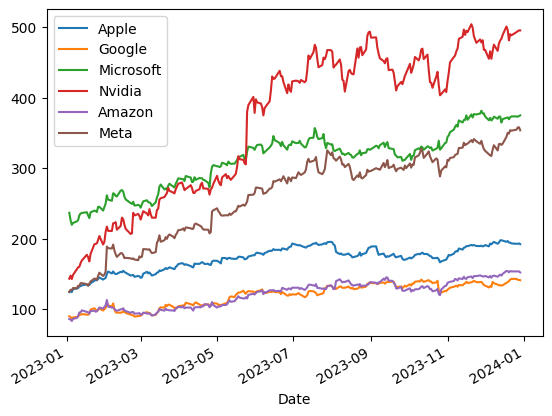

In [8]:
close_df.plot()

# Single wiondow of five missing elements

In [36]:
close_df["Missing"] = close_df["Apple"]
close_df["Missing"].iloc[200:205] = np.nan

In [37]:
close_df[close_df["Missing"].isna()]

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Missing
Date,,,,,,,
2023-10-19 00:00:00-04:00,174.768784,138.979996,329.444336,420.953247,128.399994,312.478455,NaN
2023-10-20 00:00:00-04:00,172.198959,136.740005,324.820709,413.814209,125.169998,308.322845,NaN
2023-10-23 00:00:00-04:00,172.318481,137.899994,327.455658,429.692047,126.559998,313.677185,NaN
2023-10-24 00:00:00-04:00,172.756744,140.119995,328.658813,436.571136,128.559998,312.218719,NaN
2023-10-25 00:00:00-04:00,170.425964,126.669998,338.741425,417.733673,121.389999,299.212524,NaN


In [39]:
close_df_filled = close_df.copy()
close_df_filled["VAR_Imputation"] = close_df_filled["Missing"].ffill().bfill()
close_df_filled

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Missing,VAR_Imputation
Date,,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609238,143.079788,85.820000,124.607788,124.048050,124.048050
2023-01-04 00:00:00-05:00,125.327507,88.709999,226.259186,147.417694,85.139999,127.235008,125.327507,125.327507
2023-01-05 00:00:00-05:00,123.998451,86.769997,219.553360,142.580032,83.120003,126.805458,123.998451,123.998451
2023-01-06 00:00:00-05:00,128.560852,88.160004,222.140869,148.517120,86.080002,129.882202,128.560852,128.560852
2023-01-09 00:00:00-05:00,129.086517,88.800003,224.303726,156.203354,87.360001,129.332779,129.086517,129.086517
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,193.091385,193.091385
2023-12-26 00:00:00-05:00,192.542816,142.820007,373.295135,492.766907,153.410004,354.453918,192.542816,192.542816
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,192.642548,192.642548


In [40]:
close_df_filled[close_df_filled["Missing"].isna()]

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Missing,VAR_Imputation
Date,,,,,,,,
2023-10-19 00:00:00-04:00,174.768784,138.979996,329.444336,420.953247,128.399994,312.478455,NaN,175.147293
2023-10-20 00:00:00-04:00,172.198959,136.740005,324.820709,413.814209,125.169998,308.322845,NaN,175.147293
2023-10-23 00:00:00-04:00,172.318481,137.899994,327.455658,429.692047,126.559998,313.677185,NaN,175.147293
2023-10-24 00:00:00-04:00,172.756744,140.119995,328.658813,436.571136,128.559998,312.218719,NaN,175.147293
2023-10-25 00:00:00-04:00,170.425964,126.669998,338.741425,417.733673,121.389999,299.212524,NaN,175.147293


In [41]:
close_df_filled.iloc[199].Apple

175.1472930908203

We do ffill/bfill in order to prepare the data for VAR model (forward fill to handle initial NaNs if necessary)

In [42]:
del model, results

In [43]:
# Fit the VAR model
model = VAR(close_df_filled.drop(columns = ["Missing"]))
results = model.fit(maxlags=15, ic='aic')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


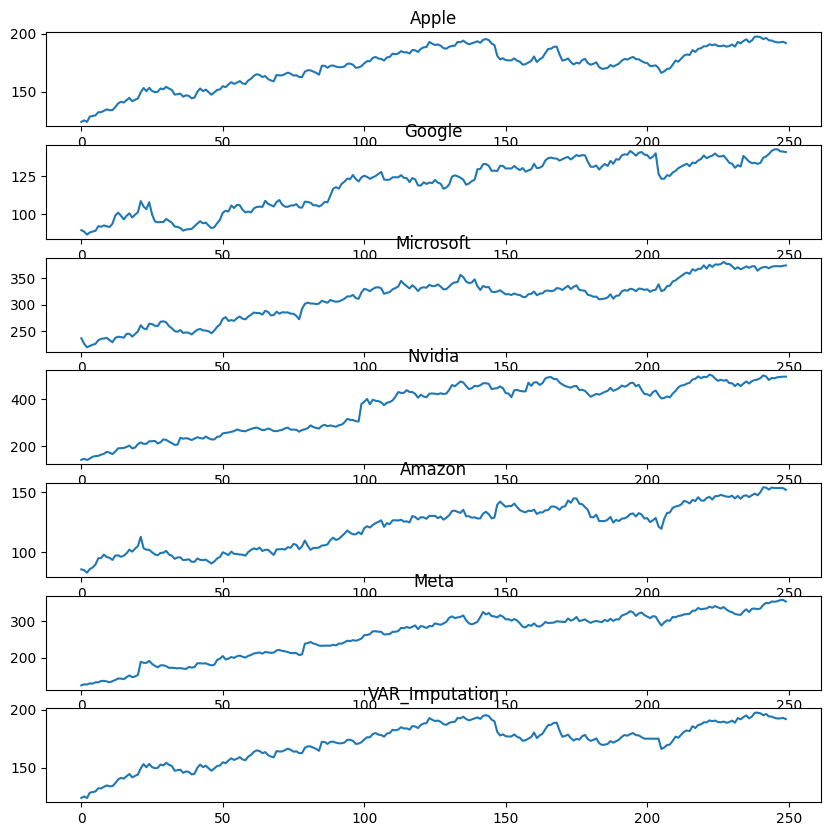

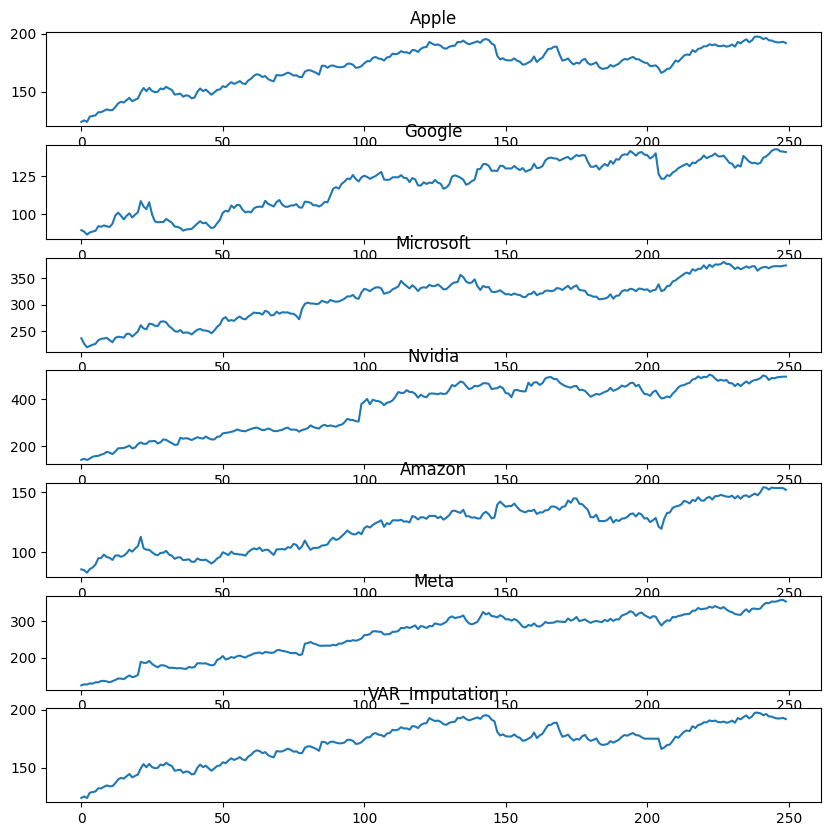

In [44]:
results.plot()

In [45]:
# Forecast missing values
def impute_missing_values(data, results):
    for i in range(len(data)):
        if np.isnan(data["Missing"].iloc[i]):  # Check if the stock price is np.nan
            # Get the previous available data points up to the maxlags
            data_slice = data.iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data["Missing"].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
    return data

# Impute the missing values
imputed_data = impute_missing_values(close_df.copy(), results)

In [48]:
imputed_data[imputed_data["Missing"].isna()]

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Missing
Date,,,,,,,


<Axes: xlabel='Date'>

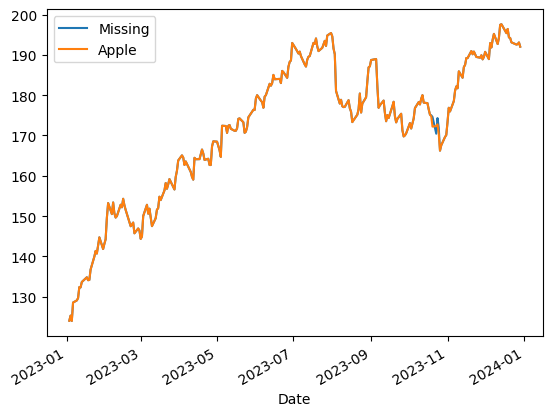

In [49]:
imputed_data[["Missing", "Apple"]].plot()

In [53]:
print(mean_squared_error(imputed_data["Missing"], imputed_data["Apple"])*(len(close_df)/5))
print(mean_squared_error(close_df["Missing"].interpolate(method='linear'), close_df["Apple"])*(len(close_df)/5))

2.793466026953301
4.766269507538527


# Multiple (10 equispaced) windows of five missing elements

In [56]:
close_df.drop(columns = ["Missing"], inplace=True)
close_df

,Apple,Google,Microsoft,Nvidia,Amazon,Meta
Date,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609238,143.079788,85.820000,124.607788
2023-01-04 00:00:00-05:00,125.327507,88.709999,226.259186,147.417694,85.139999,127.235008
2023-01-05 00:00:00-05:00,123.998451,86.769997,219.553360,142.580032,83.120003,126.805458
2023-01-06 00:00:00-05:00,128.560852,88.160004,222.140869,148.517120,86.080002,129.882202
2023-01-09 00:00:00-05:00,129.086517,88.800003,224.303726,156.203354,87.360001,129.332779
...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472
2023-12-26 00:00:00-05:00,192.542816,142.820007,373.295135,492.766907,153.410004,354.453918
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714


In [57]:
len(close_df)

250

In [6]:
def generate_equi_spaced_intervals(start, end, num_intervals, interval_length):
    total_range = end - start + 1
    step = total_range // (num_intervals - 1)
    intervals = []
    for i in range(num_intervals):
        interval_start = start + i * step
        interval_end = min(interval_start + interval_length - 1, end)
        intervals.append((interval_start, interval_end))
    return intervals

In [7]:
start = 0
end = 249
num_intervals = 10
interval_length = 5

intervals = generate_equi_spaced_intervals(start, end, num_intervals, interval_length)
for interval in intervals:
    print(interval)

(0, 4)
(27, 31)
(54, 58)
(81, 85)
(108, 112)
(135, 139)
(162, 166)
(189, 193)
(216, 220)
(243, 247)


In [67]:
intervals[1:-1]

[(27, 31),
 (54, 58),
 (81, 85),
 (108, 112),
 (135, 139),
 (162, 166),
 (189, 193),
 (216, 220)]

In [8]:
close_df["Missing"] = close_df["Apple"]
for interval in intervals[1:-1]:
    close_df["Missing"][interval[0]:interval[1]+1] = np.nan

In [9]:
len(close_df[close_df["Missing"].isna()])

40

In [70]:
close_df

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Missing
Date,,,,,,,
2023-01-03 00:00:00-05:00,124.048050,89.699997,236.609238,143.079788,85.820000,124.607788,124.048050
2023-01-04 00:00:00-05:00,125.327507,88.709999,226.259186,147.417694,85.139999,127.235008,125.327507
2023-01-05 00:00:00-05:00,123.998451,86.769997,219.553360,142.580032,83.120003,126.805458,123.998451
2023-01-06 00:00:00-05:00,128.560852,88.160004,222.140869,148.517120,86.080002,129.882202,128.560852
2023-01-09 00:00:00-05:00,129.086517,88.800003,224.303726,156.203354,87.360001,129.332779,129.086517
...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,193.091385
2023-12-26 00:00:00-05:00,192.542816,142.820007,373.295135,492.766907,153.410004,354.453918,192.542816
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,192.642548


<Axes: xlabel='Date'>

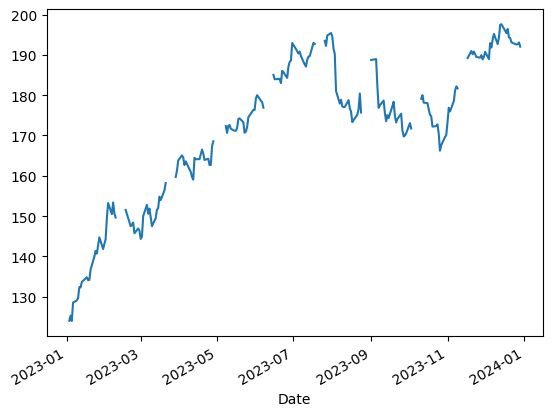

In [10]:
close_df.Missing.plot()

In [11]:
close_df_filled = close_df.copy()
close_df_filled["VAR_Imputation"] = close_df_filled["Missing"].interpolate()
close_df_filled

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Missing,VAR_Imputation
Date,,,,,,,,
2023-01-03 00:00:00-05:00,124.048042,89.699997,236.609238,143.079788,85.820000,124.607788,124.048042,124.048042
2023-01-04 00:00:00-05:00,125.327507,88.709999,226.259171,147.417679,85.139999,127.235008,125.327507,125.327507
2023-01-05 00:00:00-05:00,123.998459,86.769997,219.553375,142.580032,83.120003,126.805458,123.998459,123.998459
2023-01-06 00:00:00-05:00,128.560867,88.160004,222.140869,148.517120,86.080002,129.882202,128.560867,128.560867
2023-01-09 00:00:00-05:00,129.086533,88.800003,224.303680,156.203369,87.360001,129.332779,129.086533,129.086533
...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00-05:00,193.091385,142.720001,373.215393,488.277069,153.419998,353.015472,193.091385,193.091385
2023-12-26 00:00:00-05:00,192.542816,142.820007,373.295135,492.766907,153.410004,354.453918,192.542816,192.542816
2023-12-27 00:00:00-05:00,192.642548,141.440002,372.707275,494.146820,153.339996,357.450714,192.642548,192.642548


<Axes: xlabel='Date'>

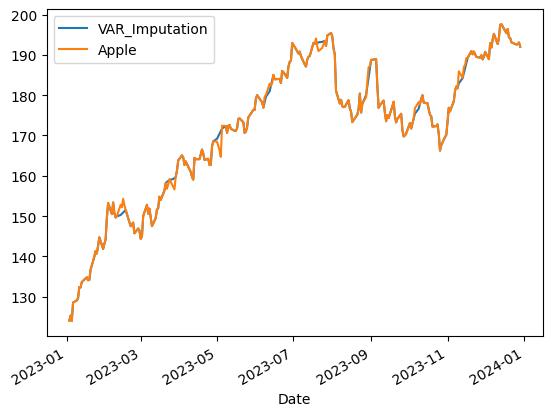

In [13]:
close_df_filled[["VAR_Imputation", "Apple"]].plot()

In [14]:
len(close_df_filled[close_df_filled["Missing"].isna()])

40

We do interpolation in order to prepare the data for VAR model (forward fill to handle initial NaNs if necessary)

In [16]:
# Fit the VAR model
model_multiple = VAR(close_df_filled.drop(columns = ["Missing"]))
results_multiple = model_multiple.fit(maxlags=15, ic='aic')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


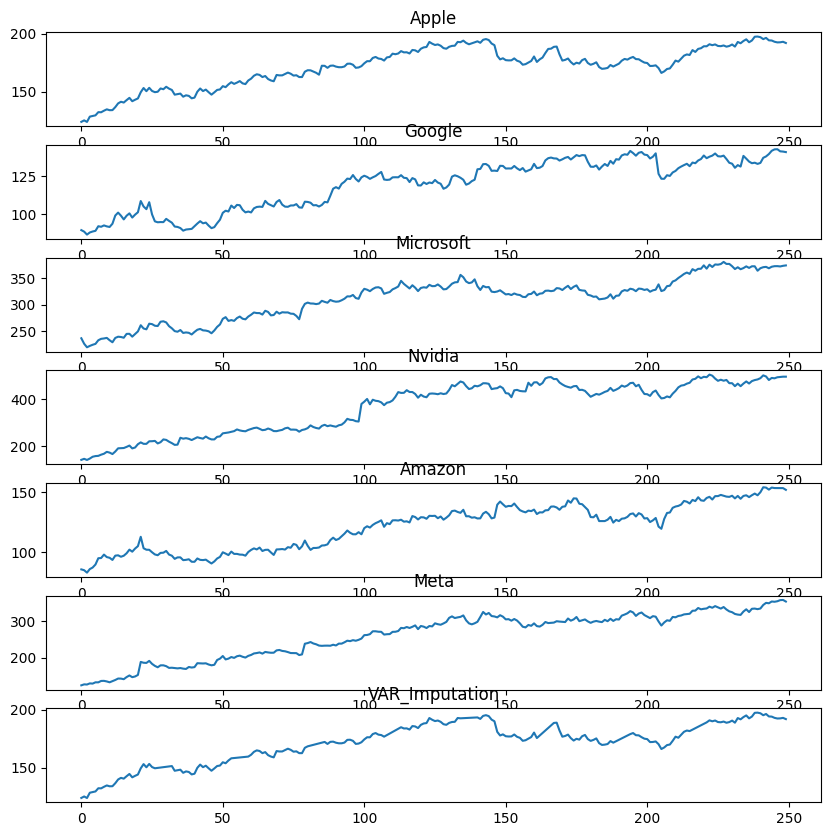

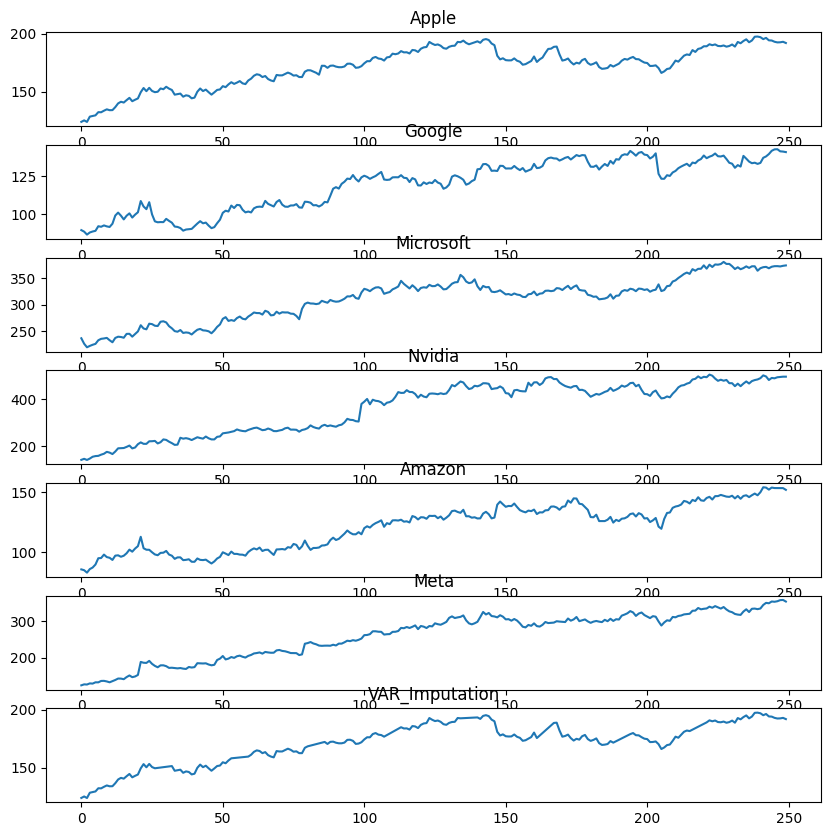

In [17]:
results_multiple.plot()

In [79]:
del imputed_data

In [19]:
# Forecast missing values
def impute_missing_values(data, results):
    for i in range(len(data)):
        if np.isnan(data["Missing"].iloc[i]):  # Check if the stock price is np.nan
            # Get the previous available data points up to the maxlags
            data_slice = data.iloc[i - results.k_ar:i].values
            if len(data_slice) == results.k_ar:
                forecast = results.forecast(data_slice, steps=1)
                data["Missing"].iloc[i] = forecast[0, 0]  # Impute the missing value using the forecast
    return data

# Impute the missing values
imputed_data = impute_missing_values(close_df.copy(), results_multiple)

In [20]:
imputed_data[imputed_data["Missing"].isna()]

,Apple,Google,Microsoft,Nvidia,Amazon,Meta,Missing
Date,,,,,,,


<Axes: xlabel='Date'>

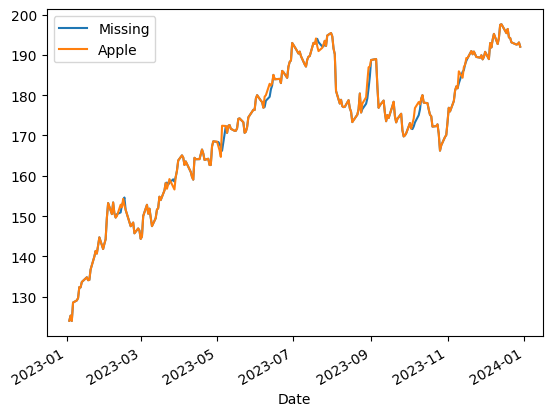

In [21]:
imputed_data[["Missing", "Apple"]].plot()

In [22]:
print(mean_squared_error(imputed_data["Missing"], imputed_data["Apple"])*(len(close_df)/5))
print(mean_squared_error(close_df["Missing"].interpolate(method='linear'), close_df["Apple"])*(len(close_df)/5))

38.79019868466888
29.05591461192301
